In [1]:
%cd "../fiberphotopy"

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [2]:
import fp_utils
import analysis
import fiber_data
import behavioral_data

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import random
import time

In [3]:
as21 = analysis.MultiSession('../../DATA/AS21R')


Importing folder rat_10_SA_1...
Importing ../../DATA/AS21R/rat_10_SA_1/bsa02032022c20_01.dat...
Importing of ../../DATA/AS21R/rat_10_SA_1/bsa02032022c20_01.dat finished in 0.0452272891998291 seconds
Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/AS21R/rat_10_SA_1/AS21RSA1Rat1002032022_0.csv finished in 1.9712748527526855 seconds

Importing folder rat_10_SA_2...
Importing ../../DATA/AS21R/rat_10_SA_2/bsa08032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_10_SA_2/bsa08032022c20_02.dat finished in 0.0624995231628418 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_10_SA_2/AS21RSA2Rat1008032022_0.csv finished in 1.092376708984375 seconds

Importing folder rat_11_SA_1...
Importing ../../DATA/AS21R/rat_11_SA_1/bsa03032022c20_01.dat...
Importing of ../../DATA/AS21R/rat_11_SA_1/bsa03032022c20_01.dat finished in 0.03565335273742676 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_11_SA_1/AS21RSA1Rat1103032022_0.csv finished in 1.8573205471038818 seconds

Importing folder rat_11_SA_2...
Importing ../../DATA/AS21R/rat_11_SA_2/bsa09032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_11_SA_2/bsa09032022c20_02.dat finished in 0.0781247615814209 seconds
Analyzing peaks...
Importing of ../

Importing of ../../DATA/AS21R/rat_5_SA_6/AS21RSA6Rat523032022_0.csv finished in 1.8132662773132324 seconds

Importing folder rat_5_SA_7...
Importing ../../DATA/AS21R/rat_5_SA_7/bsa28032022c20_01.dat...
Importing of ../../DATA/AS21R/rat_5_SA_7/bsa28032022c20_01.dat finished in 0.0414128303527832 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_5_SA_7/AS21RSAxRat528032022_0.csv finished in 1.766899585723877 seconds

Importing folder rat_8_SA_1...
Importing ../../DATA/AS21R/rat_8_SA_1/bsa03032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_8_SA_1/bsa03032022c20_02.dat finished in 0.062499284744262695 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_8_SA_1/AS21RSA1Rat803032022_0.csv finished in 1.809359073638916 seconds

Importing folder rat_8_SA_2...
Importing ../../DATA/AS21R/rat_8_SA_2/bsa04032022c20_02.dat...
Importing of ../../DATA/AS21R/rat_8_SA_2/bsa04032022c20_02.dat finished in 0.046875 seconds
Analyzing peaks...
Importing of ../../DATA/AS21R/rat_8_SA_2/

In [31]:
sw = as21.analyze('switch_d_nd',window=[30,30])

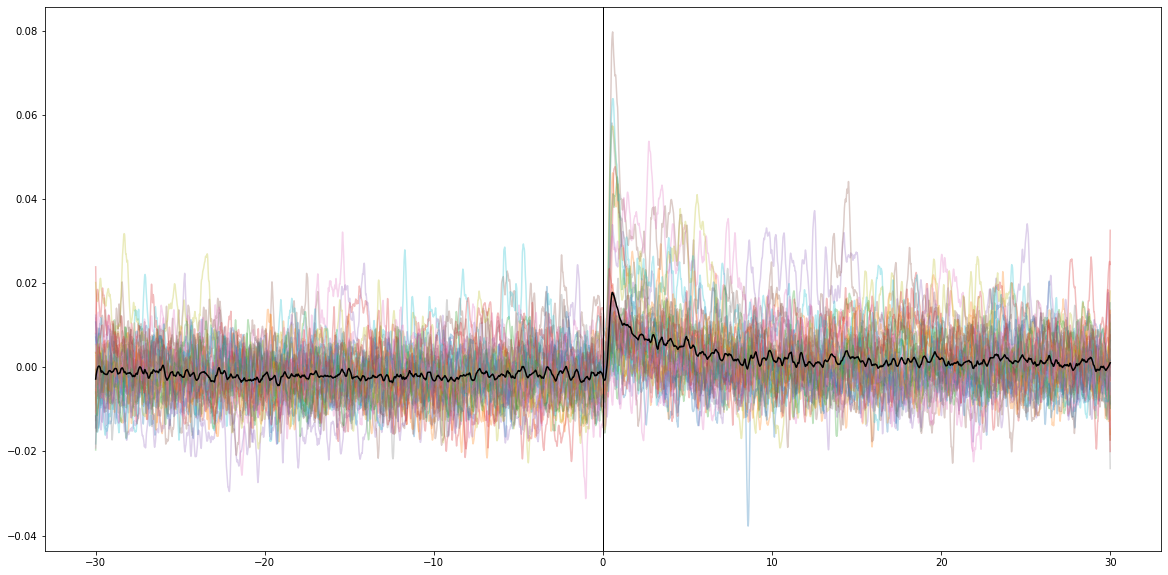

In [33]:
sw.plot()

In [34]:
for i in sw.epoch:
    print(i.shape)

(72749,)
(72750,)
(72750,)
(72750,)
(72751,)
(72751,)
(72750,)
(72750,)
(72750,)
(72750,)
(72749,)
(72750,)
(72750,)
(72750,)
(72751,)
(72750,)
(72751,)
(72750,)
(72750,)
(72751,)
(72750,)
(72750,)
(72750,)
(72750,)
(72750,)
(72751,)
(72750,)
(72750,)
(72750,)
(72750,)
(72750,)
(72750,)
(72751,)
(72750,)
(72751,)
(72749,)
(72750,)
(72750,)


In [35]:
len(sw.EPOCH)

72750

In [36]:
start = time.time()


boot_sampling_rate = 10
window             = (30,30)
boot_len           = sum(window)*boot_sampling_rate
boot_epoch         = np.linspace(-1*window[0],window[1],boot_len)
boot_iteration     = 1000
alpha              = 5

signal_samples = np.vstack([np.interp(boot_epoch,sw.epoch[i],sw.zscores[i]) for i in range(len(sw.epoch))])
boot_samples   = np.vstack([np.array([0.0]*len(boot_epoch)) for i in range(boot_iterations)])

for l in range(boot_len):
    for i in range(boot_iteration):
        boot_samples[i,l] = random.choice(signal_samples[:,l])

boot_mean = np.array([np.mean(boot_samples[:,i]) for i in range(boot_len)])
boot_CI   = np.vstack([np.percentile(boot_samples[:,i],[alpha/2,100-alpha/2]) for i in range(boot_len)]).T
        
print(time.time() - start)

0.9085960388183594


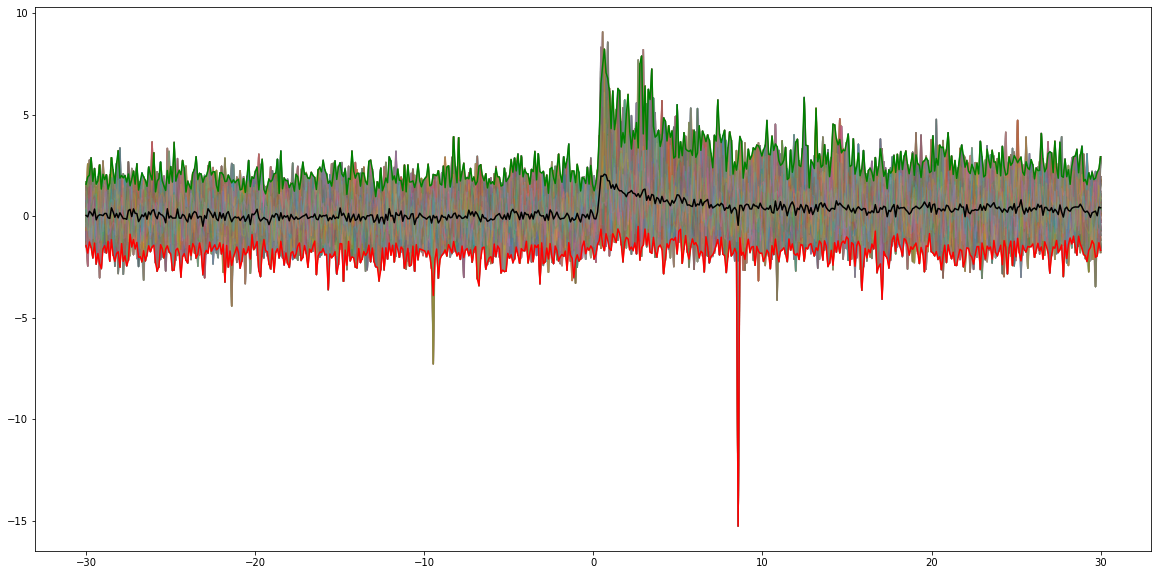

In [37]:
plt.figure(figsize=(20,10))
for i in range(int(boot_iteration)):
    plt.plot(boot_epoch,boot_samples[i,:],alpha=0.2)
plt.plot(boot_epoch,boot_mean,c='k')
plt.plot(boot_epoch,boot_CI[0],c='r')
plt.plot(boot_epoch,boot_CI[1],c='g')

In [ ]:
for i in range(boot_len):
    signal_samples

In [ ]:
a[0,:]

In [ ]:
boot_samples